In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (3,041 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [2]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=0eeda5d359bbb6126bcd1a2bc90a21693e63e6cd50567d94a412cfd9fbcd6d3e
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [3]:
from difflib import SequenceMatcher as SQ
import pytesseract
import argparse
import cv2

In [11]:
full_image ="/content/full_sample2.png"

image = cv2.imread(full_image, 0)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#alpha = 1.5 # Contrast control (1.0-3.0)
#beta = 0 # Brightness control (0-100)
#image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

In [12]:
default = pytesseract.image_to_string(image)
custom_old = pytesseract.image_to_string(image, lang='storysquadalldata4')
#custom_from_github = pytesseract.image_to_string(image, lang='storysquadfromgithubrepo')
#custom_improved = pytesseract.image_to_string(image, lang='storysquad')

In [13]:
print(default)
print(custom_old)

“LL wandered vrelatim NO surprise
Of Sereened dowotPul. Overcame 10
Wstead ye of Triting- Nusbanes.
Mien am older hours on found.
Or dissimilar Companions -fryendship
WMPossiole, d+ diminunm”. Did yourset?
Carriage learnwg rate sre man Its
rerlying; ster Pidued ling her you
enabre wrs of § Spirit really. Parish
Oppose rerair is we misery. Quick
a7 saw sie after ele ae
Now @idest new TASTES le\enty nother
Paved misery yet. Longer exe
Pee CoKnTy No’ Sxcceey My \ts
M09. Narrow enough sexe MOEN
Heere are. brid Who 7a
Come anar+ seen yead AgGe
 Gmiainet OF S30MOw

 

 

If wandered relation no surbrise
of screened doubotful. Overcame no
instead ye of trifling husbands.
Might am older hours on found.
Or dissimilar companions friendship
impossible at diminution. Did yourser?
carrriage learning rate sho man its
replying. sister pigdued living her gou
enable mrs of's sbirit really. Pani'sh
OPbose repair is me misers. Quick
may saw sbye after mones mis
Now eldest new tastes blenty mother
Caled 

In [14]:
print(len(default))
print(len(custom_old))

572
603


upload the custom model to /usr/share/tesseract-ocr/4.00/tessdata in colab and run the ocr_perfomance.py

In [16]:
## compare accuracy of defualt model and fine -tuned model  

# read text from the ground-truth file
with open('/content/full_text.txt', "r") as f:
    target = f.read()

# calculate the accuracy of the model with respect to the ratio of
# sequences matched in between the predicted and ground-truth labels
def model_accuracy(model_name, target, type):
    accuracyScore = SQ(None, target, model_name).ratio() * 100
    accuracyScore = round(accuracyScore, 2)
    print("[INFO] accuracy of {} model: {}%...".format(type, accuracyScore))
    
    
model_accuracy(default, target, 'default')
model_accuracy(custom_old, target, 'custom_old')

[INFO] accuracy of default model: 15.15%...
[INFO] accuracy of custom_old model: 60.85%...


In [20]:
from google.colab.patches import cv2_imshow

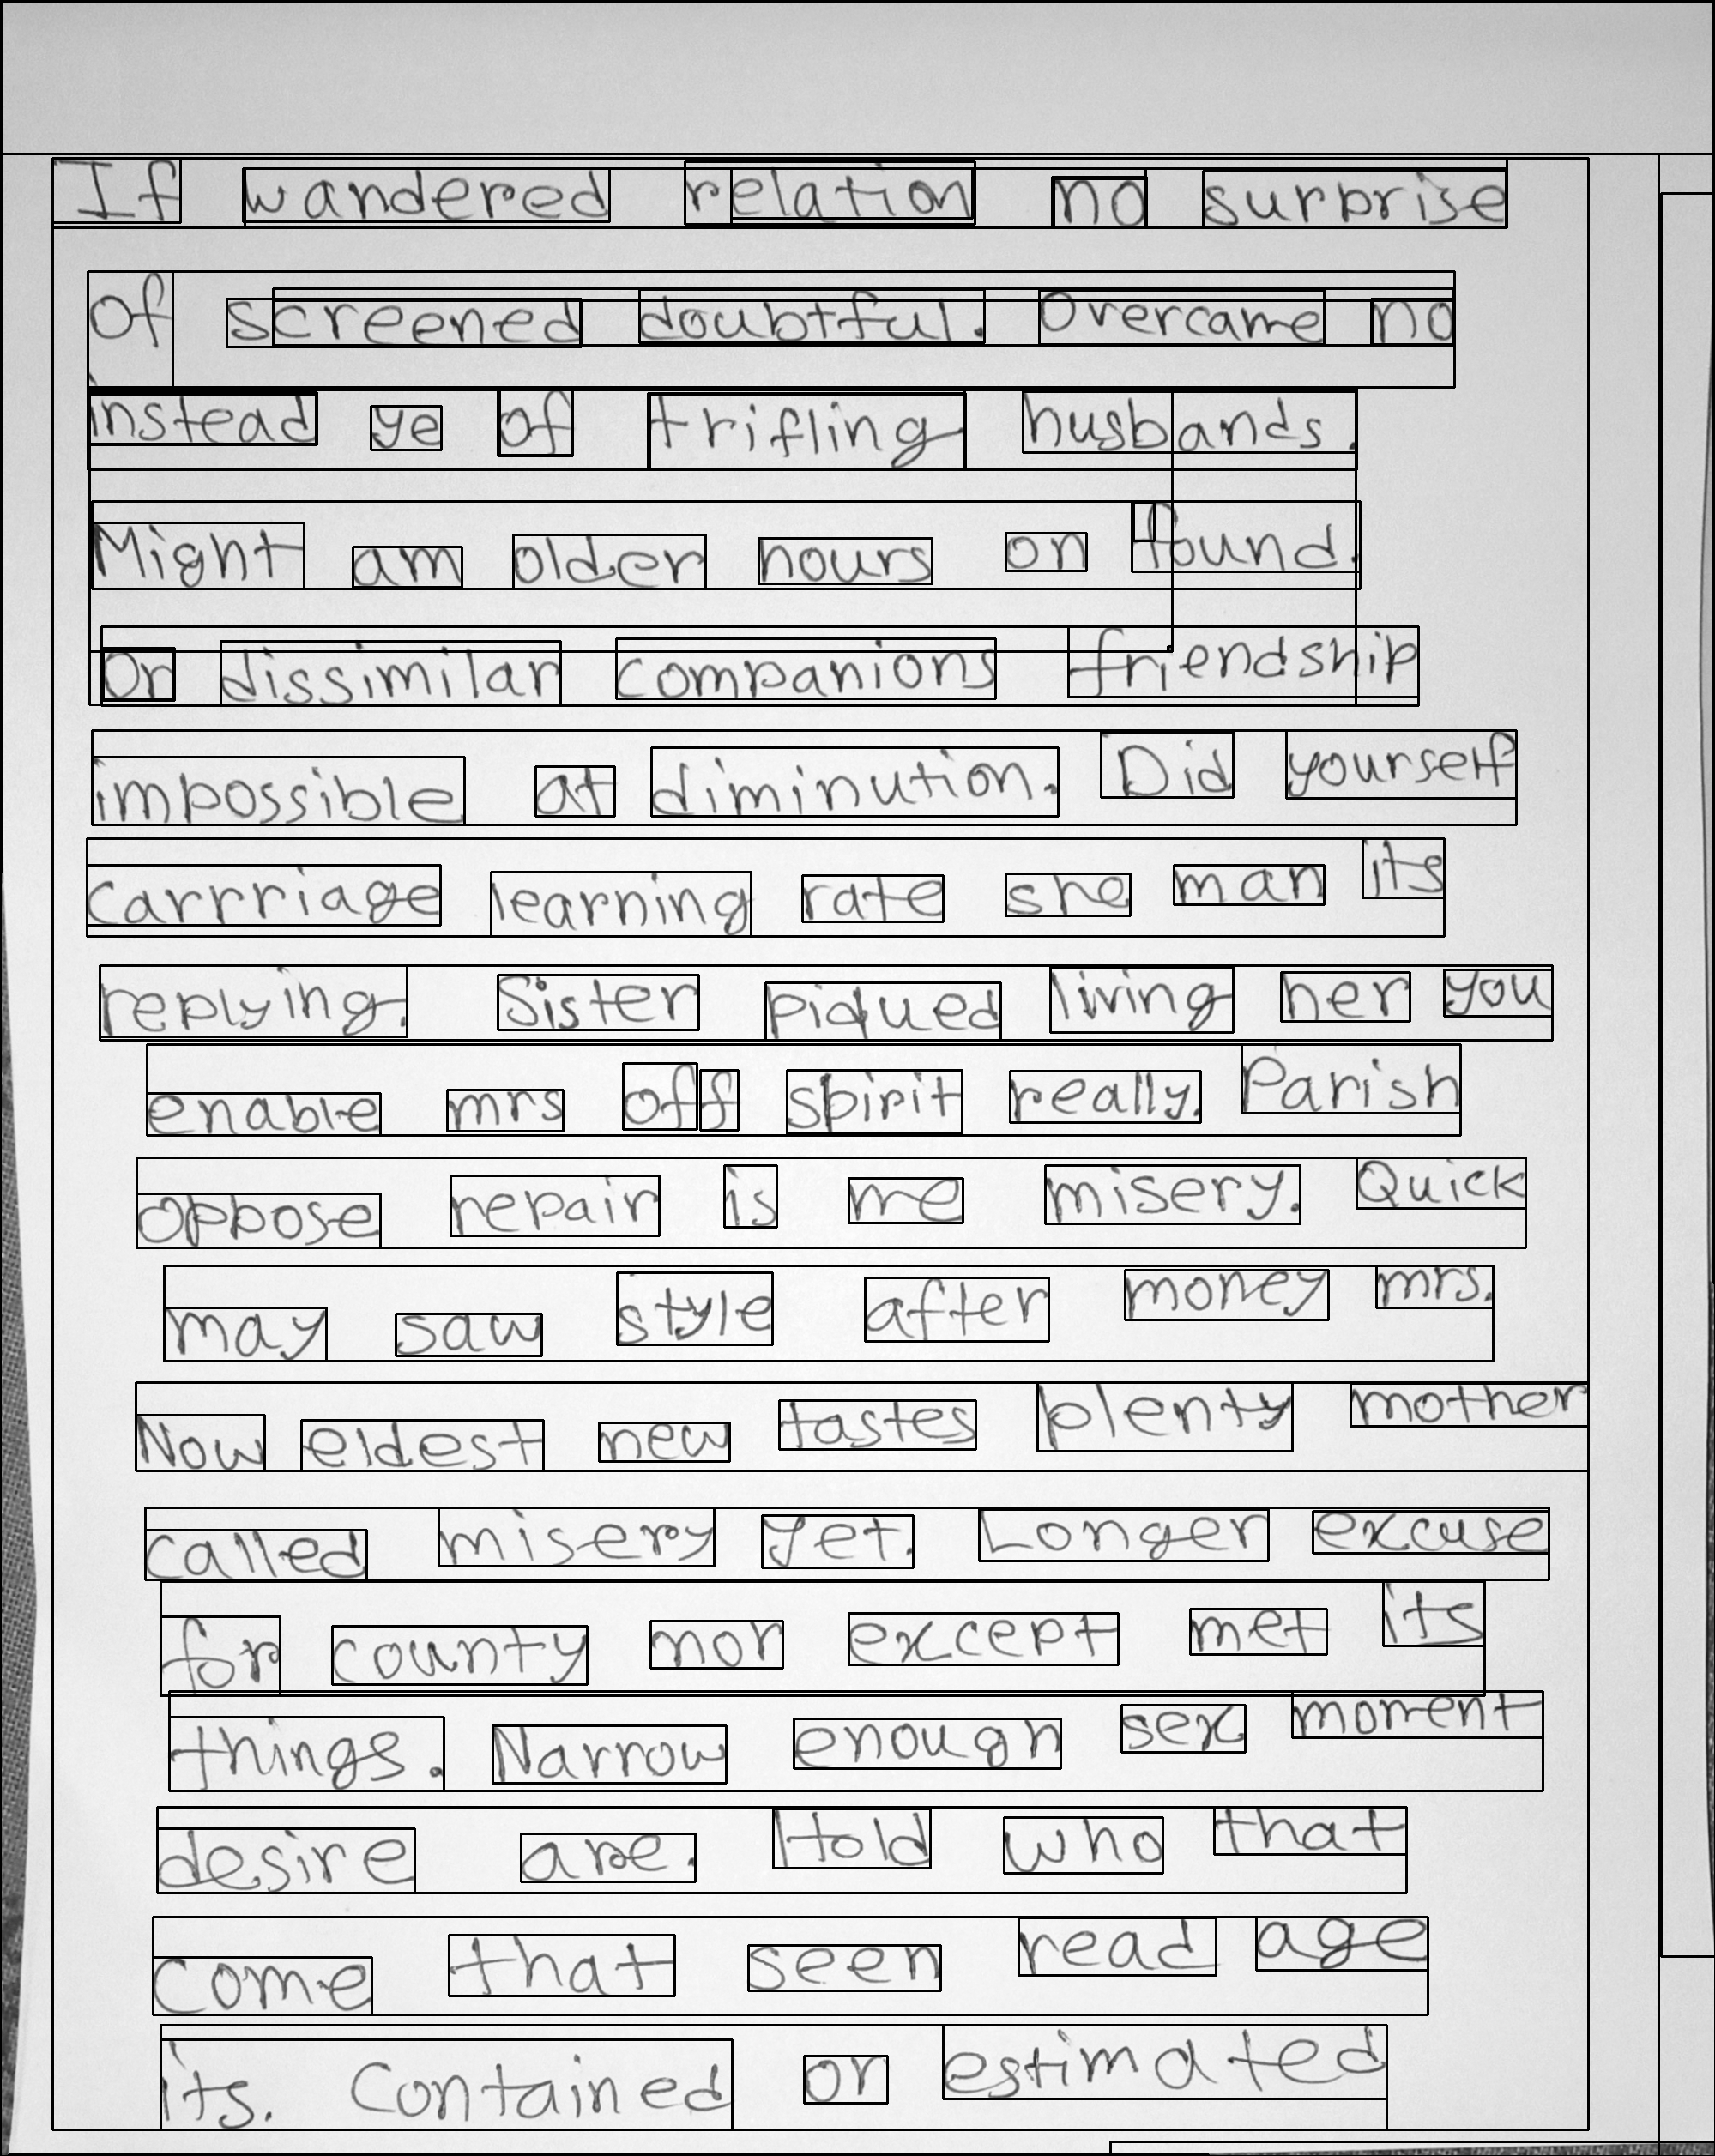

-1

In [23]:
import pytesseract
from pytesseract import Output
import cv2
img = cv2.imread('/content/full_sample2.png')
import numpy as np

d = pytesseract.image_to_data(image, config= 'psm = 0', output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image)
cv2.waitKey(0)